We will have RGB images 
Dataset Cyfer
1. Calling data in notebook through library
2. EDA & Preprocessing
3. Neural Network - Model
4. Same type of code 
5. Follow same process (Evaluate the test set)
6. Need innovation 

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report

Calling data from the Library

In [1]:
from keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 82s 0us/step


In [4]:
import matplotlib.pyplot as plt

In [5]:
x_train.shape

(50000, 32, 32, 3)

In [34]:
single_image= x_train[0]

In [35]:
single_image

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [36]:
single_image.shape

(32, 32, 3)

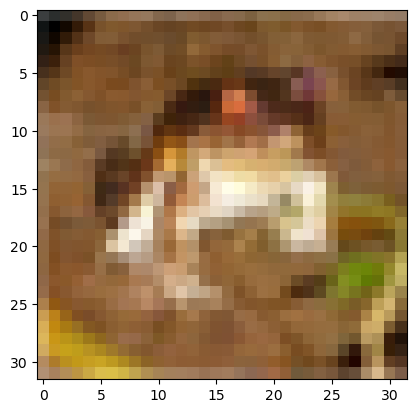

In [37]:
plt.imshow(single_image)
plt.show()

In [21]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [24]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_train.shape

(50000, 1)

One Hot encoding

In [27]:
y_example= to_categorical(y_train)

In [28]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [29]:
y_example.shape

(50000, 10)

In [30]:
y_cat_train= to_categorical(y_train,10)

In [31]:
y_cat_test= to_categorical(y_test,10)

In [38]:
single_image.max()

255

In [39]:
single_image.min()

0

Normalize Pixels

In [40]:
x_train= x_train/255
x_test= x_test/255

In [41]:
scaled_image= x_train[0]

In [42]:
scaled_image.min()

0.0

In [43]:
scaled_image.max()

1.0

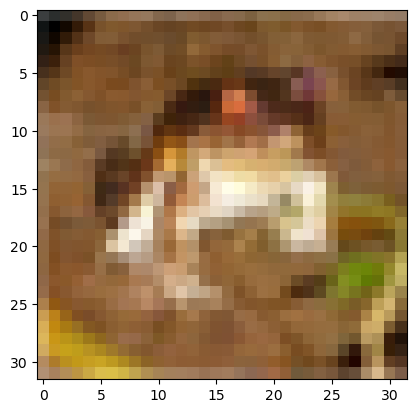

In [44]:
plt.imshow(scaled_image)

Because the pics are already 3 channel so we are not Reshaping the data

# Model

In [46]:
model= Sequential()
#32 is a random number and good for this dataset. Relu is good for hidden layers
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= (32, 32, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

#adding one more Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))

#we flatten it becasue dense nural network one dimensional data. Till above layer we are playing with pixels
model.add(Flatten())

model.add(Dense(128, activation='relu'))
#we can't change. 10 means we have 10 classification classes. i will put sigmoid if the classification is binary and neuron as 1
model.add(Dense(10, activation='softmax'))

In [47]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        16416     
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [50]:
model.fit(x_train, y_cat_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 87s 56ms/step - loss: 0.9282 - accuracy: 0.6774
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8117 - accuracy: 0.7214
Epoch 3/20
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7061 - accuracy: 0.7570
Epoch 4/20
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6117 - accuracy: 0.7920
Epoch 5/20
1563/1563 [==============================] - 55s 35ms/step - loss: 0.5277 - accuracy: 0.8227
Epoch 6/20
1563/1563 [==============================] - 56s 36ms/step - loss: 0.4474 - accuracy: 0.8476
Epoch 7/20
1563/1563 [==============================] - 60s 39ms/step - loss: 0.3796 - accuracy: 0.8716
Epoch 8/20
1563/1563 [==============================] - 60s 39ms/step - loss: 0.3251 - accuracy: 0.8893
Epoch 9/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.2747 - accuracy: 0.9079
Epoch 10/20
1563/1563 [==============================] - 67s 43m

In [51]:
model.metrics_names

['loss', 'accuracy']

In [57]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 4s 12ms/step - loss: 3.1224 - accuracy: 0.6475


[3.1224403381347656, 0.6474999785423279]

In [53]:
from sklearn.metrics import classification_report

In [54]:
import numpy as np

In [58]:
predictions= model.predict(x_test)
prediction_classes= np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 13ms/step


In [59]:
report= classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.63      0.76      0.69      1000
           1       0.79      0.78      0.78      1000
           2       0.57      0.53      0.55      1000
           3       0.49      0.35      0.41      1000
           4       0.58      0.62      0.60      1000
           5       0.53      0.57      0.55      1000
           6       0.68      0.72      0.70      1000
           7       0.64      0.74      0.68      1000
           8       0.79      0.75      0.77      1000
           9       0.78      0.66      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000

